<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGP-kraken2" data-toc-modified-id="LLMGP-kraken2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGP-kraken2</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#LLMGP-kraken2:-summary" data-toc-modified-id="LLMGP-kraken2:-summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLMGP-kraken2: summary</a></span><ul class="toc-item"><li><span><a href="#Reads-mapped" data-toc-modified-id="Reads-mapped-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Reads mapped</a></span><ul class="toc-item"><li><span><a href="#GTDBr86" data-toc-modified-id="GTDBr86-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>GTDBr86</a></span></li><li><span><a href="#GTDBr89" data-toc-modified-id="GTDBr89-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>GTDBr89</a></span></li><li><span><a href="#All-classifications" data-toc-modified-id="All-classifications-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>All classifications</a></span></li></ul></li></ul></li><li><span><a href="#LLMGP-humann2" data-toc-modified-id="LLMGP-humann2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>LLMGP-humann2</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Gene-families" data-toc-modified-id="Gene-families-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Gene families</a></span></li><li><span><a href="#Pathways" data-toc-modified-id="Pathways-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Pathways</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Run `LLMGP` pipeline on custom GTDBr89 dataset (created with `Struo`)
   * Results (% mapped) will be compared to profiling with profiling databased including animal gut MAGs

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/'

samples_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples_cov-gte0.3.tsv'
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmgp/'
threads = 16

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(doParallel)
library(LeyLabRMisc)

In [6]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/ 


# LLMGP-kraken2

* just running kraken2

In [4]:
config_file = file.path(work_dir, 'config_custom-db.yaml')
cat_file(config_file)

# DESCRIPTION:
## This is an example of running the pipeline with a custom humann2 db.
## This config is set up to just use the custom nucleotide db, but the protein db could be used also (or instead)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGQC/samples_cov-gte0.3.tsv

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/

# read file path
# use "None" if full file path is included in the samples_file
read_file_path: None

#-- DB --#
## humann2 
### custom humann2 databases
humann2_nuc_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/humann2/GTDBr89/all_genes_annot.fna.gz
humann2_prot_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/humann2/GTDBr89/all_genes_annot.dmnd
### required humann2 database files (no need to change this)
genefamily_annotation_db: /ebio/abt3_projec

## Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgp
screen -L -S llmgp-ga-GTDBr89 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/config_custom-db.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/SGE_log 30
```

# LLMGP-kraken2: summary

In [7]:
# samples data
samples = read.delim(samples_file, sep='\t') 
samples 

Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity
<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648
⋮,⋮,⋮,⋮,⋮,⋮
X256_Zander,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X256_Zander/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X256_Zander/R2_final.fq.gz,9198058,0.9757480,14.88468
X84_Common_Chiffchaff,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X84_Common_Chiffchaff/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X84_Common_Chiffchaff/R2_final.fq.gz,24926183,0.9791558,14.22184


In [8]:
# reading in metadata
metadata = read.delim(metadata_file, sep='\t') %>%
    mutate(diet = gsub(' ', '', diet),
           SampleID = gsub('^F', 'XF', SampleID))
metadata 

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,temp_regulation,collection_date,season,samp_store_days,samp_collect_device,sampling_method,diet,feeding_style,digestive_system,digestive_system_detail
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>
XF14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,ectotherm/poikilotherm,2010-08-10,summer,317,Greiner Polypropylene Tube 50ml,feces sampling,omnivore,NA,simple,simple
XF35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,endotherm/homoiotherm,2010-09-29,autumn,229,Greiner Polystyrene 30ml Faeces Container,feces sampling,herbivore,intermediate type,foregut,foregut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X189_fail_Rainbow_Trout,189.fail,Regenbogenforelle,Rainbow.Trout,Oncorhynchus_mykiss,NA,8022,Actinopterygii,Salmoniformes,Salmonidae,⋯,ectotherm/poikilotherm,2012-03-01,winter,467,Eppendorf tube,feces sampling,carnivore,NA,simple,simple
X232_fail_Brown_Trout,232.fail,Seeforelle,Brown.Trout,Salmo_trutta,NA,8032,Actinopterygii,Salmoniformes,Salmonidae,⋯,ectotherm/poikilotherm,2012-03-15,winter,453,Polyethylene freezer bag,gut section,carnivore,NA,simple,simple


## Reads mapped

### GTDBr86

In [9]:
# listing bracken kreport files from 
x = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGP_sub5k/'
kreports = list.files(file.path(x, 'kraken'), pattern='*_bracken.kreport', full.names=TRUE)
kreports %>% length %>% print

[1] 291


In [10]:
# reading in tables
read_kreport = function(x){
    df = read.delim(x, sep='\t', header=FALSE)
    df$Sample = gsub('.+/|_bracken.kreport', '', x)
    return(df)
}

registerDoParallel(threads)
to_keep = c('unclassified', 'root', 'cellular organisms', 'Bacteria', 'Archaea')
GTDBr86_unmapped = plyr::llply(as.list(kreports), read_kreport, .parallel=TRUE) %>%
    do.call(rbind, .) %>%
    mutate(V6 = gsub('^ +', '', V6)) %>%
    filter(V6 %in% to_keep)
         
GTDBr86_unmapped 

V1,V2,V3,V4,V5,V6,Sample
<dbl>,<int>,<int>,<fct>,<int>,<chr>,<chr>
70.26,48831526,48831526,U,0,unclassified,unassigned
29.74,20671795,0,R,1,root,unassigned
⋮,⋮,⋮,⋮,⋮,⋮,⋮
63.20,631661,0,D,2,Bacteria,XF90_Domestic_Dog
0.03,315,0,D,2157,Archaea,XF90_Domestic_Dog


In [11]:
# adding metadata
GTDBr86_unmapped = GTDBr86_unmapped %>%
    left_join(metadata %>% 
                dplyr::select(SampleID, class, order, family, genus, scientific_name, 
                              habitat, diet), 
                c('Sample'='SampleID')) %>%
    mutate(perc_unmapped = 100 - V1) 

GTDBr86_unmapped 

V1,V2,V3,V4,V5,V6,Sample,class,order,family,genus,scientific_name,habitat,diet,perc_unmapped
<dbl>,<int>,<int>,<fct>,<int>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>
70.26,48831526,48831526,U,0,unclassified,unassigned,NA,NA,NA,NA,NA,NA,NA,29.74
29.74,20671795,0,R,1,root,unassigned,NA,NA,NA,NA,NA,NA,NA,70.26
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63.20,631661,0,D,2,Bacteria,XF90_Domestic_Dog,Mammalia,Carnivora,Canidae,Canis,Canis_lupus,terrestrial habitat,carnivore,36.80
0.03,315,0,D,2157,Archaea,XF90_Domestic_Dog,Mammalia,Carnivora,Canidae,Canis,Canis_lupus,terrestrial habitat,carnivore,99.97


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
% unmapped,1.08,44.58,78.76,69.00827,97.57,99.99,37.398,15.268


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/04a86fdd3659939359f281103fae2548.RDS 


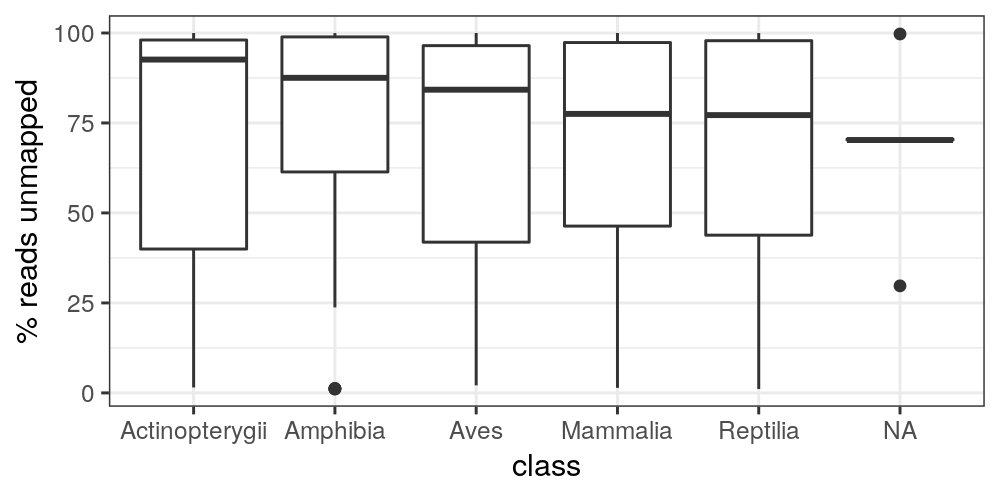

In [13]:
# summarizing
GTDBr86_unmapped$perc_unmapped %>% summary_x('% unmapped')

p = GTDBr86_unmapped %>%
    ggplot(aes(class, perc_unmapped)) +
    geom_boxplot() +
    scale_color_discrete('Clade') +
    labs(y='% reads unmapped') +
    theme_bw()

p.dims(5,2.5)
Plot(p)

### GTDBr89

In [14]:
# unclassified
F = file.path(work_dir, 'kraken', 'all-combined_kraken-unclassified.tsv')
GTDBr89_unmapped = read.delim(F, sep='\t')
GTDBr89_unmapped 

sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name
<fct>,<dbl>,<int>,<int>,<fct>,<int>,<fct>
X258_Eurasian_Magpie,88.76,1202066,1202066,U,0,unclassified
X71_Fire_Salamander,78.92,1548978,1548978,U,0,unclassified
⋮,⋮,⋮,⋮,⋮,⋮,⋮
X256_Zander,54.63,5029986,5029986,U,0,unclassified
X84_Common_Chiffchaff,71.99,17948275,17948275,U,0,unclassified


In [15]:
# adding metadata
GTDBr89_unmapped = GTDBr89_unmapped %>%
    left_join(metadata %>% 
                dplyr::select(SampleID, class, order, family, genus, 
                              scientific_name, habitat, diet), 
                c('sample'='SampleID')) 

GTDBr89_unmapped

Warning message:
“Column `sample`/`SampleID` joining factor and character vector, coercing into character vector”


sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name.x,class,order,family,genus,scientific_name.y,habitat,diet
<chr>,<dbl>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
X258_Eurasian_Magpie,88.76,1202066,1202066,U,0,unclassified,Aves,Passeriformes,Corvidae,Pica,Pica_pica,terrestrial habitat,omnivore
X71_Fire_Salamander,78.92,1548978,1548978,U,0,unclassified,Amphibia,Caudata,Salamandridae,Salamandra,Salamandra_salamandra,terrestrial habitat,carnivore
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X256_Zander,54.63,5029986,5029986,U,0,unclassified,Actinopterygii,Perciformes,Percidae,Sander,Sander_lucioperca,aquatic habitat,carnivore
X84_Common_Chiffchaff,71.99,17948275,17948275,U,0,unclassified,Aves,Passeriformes,Sylviidae,Phylloscopus,Phylloscopus_collybita,terrestrial habitat,omnivore


### All classifications

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
% unmapped,5.68,47.7175,64.455,62.78133,83.57,95.5,31.448,12.839


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/fc41751f56b61094f45582d655dc5ef2.RDS 


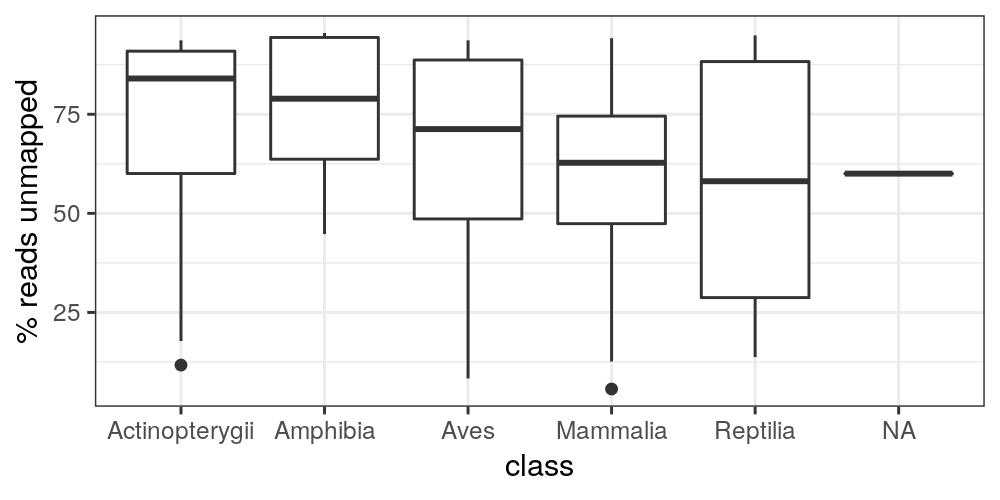

In [16]:
# summarizing
GTDBr89_unmapped$percent_reads %>% summary_x('% unmapped')

p = GTDBr89_unmapped %>%
    ggplot(aes(class, percent_reads)) +
    geom_boxplot() +
    labs(y='% reads unmapped') +
    theme_bw()

p.dims(5,2.5)
Plot(p)

# LLMGP-humann2

In [7]:
config_file = file.path(work_dir, 'config_custom-db_humann2.yaml')
cat_file(config_file)

# DESCRIPTION:
## This is an example of running the pipeline with a custom humann2 db.
## This config is set up to just use the custom nucleotide db, but the protein db could be used also (or instead)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGQC/samples_cov-gte0.3.tsv

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/

# read file path
# use "None" if full file path is included in the samples_file
read_file_path: None

#-- DB --#
## humann2 
### custom humann2 databases
humann2_nuc_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/humann2/GTDBr89/all_genes_annot.fna.gz
humann2_prot_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/humann2/GTDBr89/all_genes_annot.dmnd
### required humann2 database files (no need to change this)
genefamily_annotation_db: /ebio/abt3_projec

## Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgp/
screen -L -S llmgp-ga-GTDBr89 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/config_custom-db_humann2.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/SGE_log 30
```

# Summary

## Gene families

In [17]:
# genes
genes_file = file.path(work_dir, 'humann2', 'normalized', 'unstratified', 
                      'regroup', 'annot', 'genefamilies_uniref50_default.tsv.gz')
cmd = glue::glue('gunzip -c {F}', F=genes_file)
genes = fread(cmd=cmd, sep='\t', nrows=10) %>%
    as_tibble %>%
    rename("Gene_family" = `# Gene Family`) %>%
    gather(Sample, Abundance, -Gene_family, -annotation) %>%
    mutate(Sample = gsub('_Abundance-RPKs', '', Sample))

genes

Gene_family,annotation,Sample,Abundance
<chr>,<chr>,<chr>,<dbl>
UNMAPPED,None,X101_Horse,0.919965
UniRef50_A0A008K4C1,None,X101_Horse,0.000000
⋮,⋮,⋮,⋮
UniRef50_A0A009BJ73: UDP-glucose 4-epimerase,UDP-glucose 4-epimerase,unassigned,0
UniRef50_A0A009DVE3,None,unassigned,0


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Unmapped,0.249975,0.7472543,0.899812,0.8272816,0.966634,0.999579,0.276,0.113


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/e66a8b437261fc75445c7d7b603687f7.RDS 


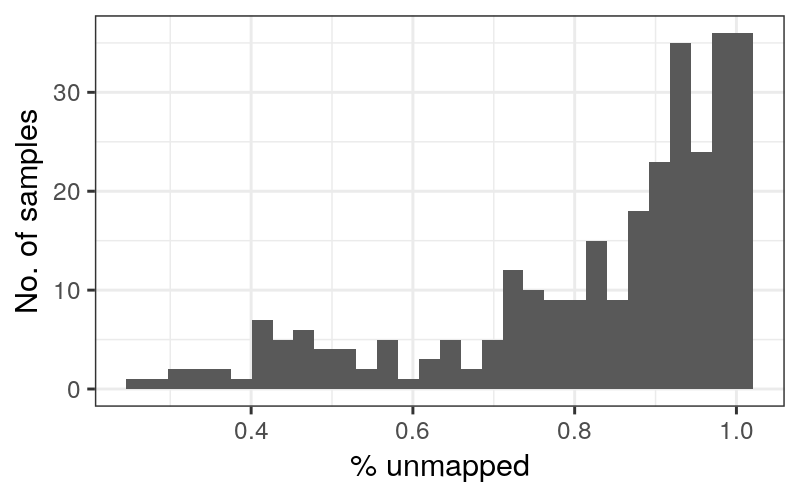

In [18]:
# unmapped
x= genes %>%
    filter(Gene_family == c('UNMAPPED')) 

x$Abundance %>% summary_x('Unmapped')

p = genes %>%
    filter(Gene_family == c('UNMAPPED')) %>%
    ggplot(aes(Abundance)) +
    geom_histogram(bins=30) +
    labs(x='% unmapped', y='No. of samples') +
    theme_bw()

p.dims(4, 2.5)
Plot(p)

## Pathways

In [19]:
F = file.path(work_dir, 'humann2', 'normalized', 'unstratified', 'pathabundance.tsv.gz')
cmd = glue::glue('gunzip -c {F}', F=F)
ptwy = fread(cmd=cmd, sep='\t') %>%
    as_tibble %>%
    rename('Pathway' = `# Pathway`) %>%
    gather(Sample, Abundance, -Pathway) %>%
    mutate(Sample = gsub('_Abundance', '', Sample))

ptwy 

Pathway,Sample,Abundance
<chr>,<chr>,<dbl>
UNMAPPED,X101_Horse,0.9199650
UNINTEGRATED,X101_Horse,0.0658207
⋮,⋮,⋮
VALDEG-PWY: L-valine degradation I,unassigned,2.24643e-05
VALSYN-PWY: L-valine biosynthesis,unassigned,1.85255e-04


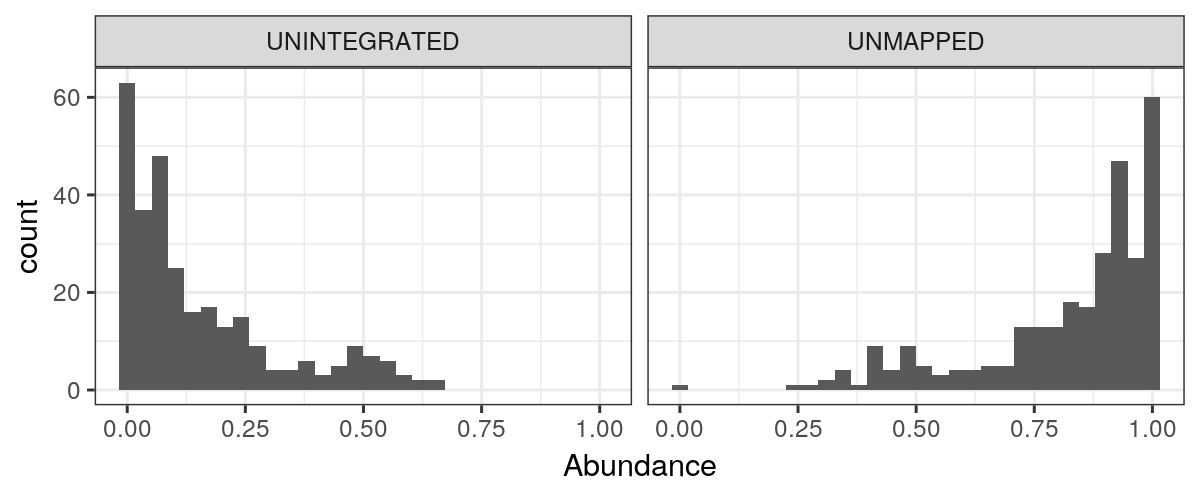

In [21]:
# percent unmapped or unintegrated
p = ptwy %>%
    filter(Pathway %in% c('UNMAPPED', 'UNINTEGRATED')) %>%
    ggplot(aes(Abundance)) +
    geom_histogram(bins=30) +
    facet_grid(. ~ Pathway) +
    theme_bw()

p.dims(6, 2.5)
plot(p)

In [22]:
# percent unmapped or unintegrated
ptwy_s = ptwy %>%
    filter(Pathway %in% c('UNMAPPED', 'UNINTEGRATED')) %>%
    group_by(Sample) %>%
    summarize(Abundance = sum(Abundance)) %>%
    ungroup() %>%
    filter(Abundance > 0)

ptwy_s$Abundance %>% summary_x('Frac. unmapped/unintegrated')

p = ptwy_s %>%
    ggplot(aes(Abundance)) +
    geom_histogram(bins=40) +
    theme_bw() +
    labs(x='Frac. unmapped/unintegrated', y='No. of samples')

dims(4, 2.5)
plot(p)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Frac. unmapped/unintegrated,0.912179,0.973316,0.9867334,0.9811384,0.9968559,0.9999994,0.032,0.013


ERROR: Error in dims(4, 2.5): could not find function "dims"


# sessionInfo

In [23]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/tidyverse/lib/libopenblasp-r0.3.7.so

Random number generation:
 RNG:     Mersenne-Twister 
 Normal:  Inversion 
 Sample:  Rounding 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] LeyLabRMisc_0.1.2 doParallel_1.0.15 iterators_1.0.12  foreach_1.4.7    
[5] data.table_1.12.8 ggplot2_3.2.1     tidyr_1.0.0       dplyr_0.8.3      

loaded via a names

In [47]:
pipelineInfo(pipeline_dir)

LLMGP
=====

Ley Lab Metagenome Profiler (LLMGP)

* Version: 0.8.0
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/bowtie2.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::samtools
- bioconda::bedtools
- bioconda::bowtie2

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/compress.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::dsrc

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/fastqc.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- bioconda::fastqc

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/hadley.yaml <==
channels:
- conda-forge
dependencies:
- conda-forge::r-ape
- conda-forge::r-dplyr
- conda-forge::r-tidyr
- conda-forge::r-ggplot2

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/humann2.yaml <==
channels:
- con